# Coursework 1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs.

You should receive an email at your imperial address inviting you to join the course team on PaperSpace (within a day of the coursework being released).

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook. You can ignore the "tests" folder as it is only required for colab.


#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the /content/ directory (this is the default working directory - you can also change directories with %cd). You may also need to place a copy of the CW ipynb in the /content/ directory. A better option is to mount colab on gdrive and keep the files there (so you only need to do the set up once).

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [2]:
%pip install -q otter-grader pandoc torch torchvision scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Initialization Cell
import time
import numpy as np
import matplotlib.pyplot as plt  # DO NOT use %matplotlib inline in the notebook
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
rng_seed = 90


## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        self.w = torch.zeros(out_channels, in_channels,
                             kernel_size, kernel_size)
        if bias:
            self.b = torch.zeros(out_channels)
        else:
            self.b = None
        self.F = out_channels
        self.C = in_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass                                     #
        out = F.conv2d(x, self.w, self.b, stride=self.stride,
                       padding=self.padding)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


c:\Users\Euan Imperial\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
grader.check("Convolution Layer")


Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.kernel_size = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = F.max_pool2d(x, self.kernel_size)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [5]:
grader.check("MaxPool Layer")


MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

In [6]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.w = torch.zeros(in_channels, out_channels)
        if bias:
            self.b = torch.zeros(out_channels)
        else:
            self.b = None

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = torch.matmul(x, self.w)
        if self.b is not None:
            out += self.b

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [7]:
grader.check("Linear Layer")


Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

In [8]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
		An implementation of a Batch Normalization over a mini-batch of 2D inputs.

		The mean and standard-deviation are calculated per-dimension over the
		mini-batches and gamma and beta are learnable parameter vectors of
		size num_features.

		Parameters:
		- num_features: C from an expected input of size (N, C, H, W).
		- eps: a value added to the denominator for numerical stability. Default: 1e-5
		- momentum: the value used for the running_mean and running_var
		computation. Default: 0.1 . (i.e. 1-momentum for running mean)
		"""
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        self.gamma = torch.ones(num_features)
        self.beta = torch.zeros(num_features)
        self.running_mean = torch.zeros(num_features)
        self.running_var = torch.ones(num_features)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        mean = x.mean(dim=(0, 2, 3), keepdim=True)
        var = x.var(dim=(0, 2, 3), keepdim=True)
        x = (x - mean) / (var + self.eps).sqrt()
        self.running_mean = self.momentum * self.running_mean + \
            (1 - self.momentum) * mean.squeeze()
        self.running_var = self.momentum * self.running_var + \
            (1 - self.momentum) * var.squeeze()
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return x


In [9]:
grader.check("BatchNorm Layer")


BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

In [10]:
def printProgressBar(iteration, total, prefix='', suffix='', decimals=1, length=50, fill='█', printEnd="\r"):
    percent = ("{0:." + str(decimals) + "f}").format(100 *
                                                     (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end=printEnd)
    if iteration == total:
        print()


In [11]:
grader.check_all()


BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [12]:
ON_COLAB = False

# !wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
# !wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
# if ON_COLAB:
#     !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
#     !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
# else:
#     !unzip NaturalImageNetTest.zip?download=1 > /dev/null
#     !unzip NaturalImageNetTrain.zip?download=1 > /dev/null


In [13]:
# torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
# other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)


In [35]:
# When we import the images we want to first convert them to a tensor.
# It is also common in deep learning to normalise the the inputs. This
# helps with stability.
#  To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images
#  (random rotations, blurring the image, randomly cropping the image). To find out
#  more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize(mean.tolist(), std.tolist()),
    ]
)
train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTest'

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set, val_set = torch.utils.data.random_split(
    train_dataset, [n-n_val, n_val])

print(len(train_set), len(val_set), len(test_dataset))

# The number of images to process in one go. If you run out of GPU
#  memory reduce this number!
batch_size = 16

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(
    train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size,
                        shuffle=True, num_workers=2)
loader_test = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)


17986 1998 2000


In [49]:
from collections import Counter
labels = ['African Elephant', 'Kingfisher', 'Deer', 'Brown Bear', 'Chameleon', 'Dragonfly',
              'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
              'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
count_per_class = dict(Counter(train_dataset.targets))
count_per_label = {labels[k]: v for (k, v) in sorted(count_per_class.items(), key=lambda item: item[1])}
print(count_per_label)


{'Red Fox': 426, 'White Rhino': 512, 'Brown Bear': 548, 'Kingfisher': 732, 'Chameleon': 747, 'Tiger': 751, 'Deer': 835, 'Lion': 891, 'Peacock': 916, 'Orangutan': 923, 'King Penguin': 956, 'Snail': 1018, 'Gorilla': 1111, 'Hawk': 1207, 'Dragonfly': 1224, 'Giant Panda': 1364, 'African Elephant': 1371, 'Ladybug': 1415, 'Meerkat': 1438, 'Koala': 1599}


In [15]:
unnormalize = transforms.Normalize(
    (-mean / std).tolist(), (1.0 / std).tolist())


def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x


def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).clip(0, 1))


**Visualising some example images** 

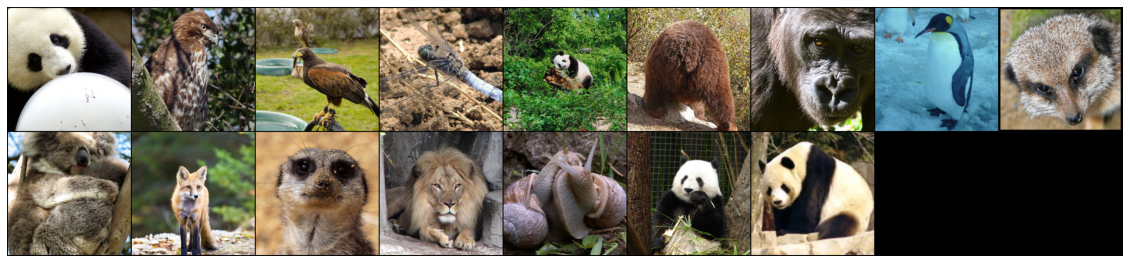

In [17]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20, 10))
plt.axis('off')
show(img)


Next, we define ResNet-18:

In [19]:
# define resnet building blocks

class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3,
                                         stride=stride, padding=1, bias=False),
                                  nn.BatchNorm2d(outchannel),
                                  nn.ReLU(inplace=True),
                                  Conv2d(outchannel, outchannel, kernel_size=3,
                                         stride=1, padding=1, bias=False),
                                  nn.BatchNorm2d(outchannel))

        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel,
                                                 kernel_size=1, stride=stride,
                                                 padding=0, bias=False),
                                          nn.BatchNorm2d(outchannel))

    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out


# define resnet

class ResNet(nn.Module):
    def __init__(self,
                 ResidualBlock,
                 channels_and_stride,
                 max_pool_size,
                 num_classes=20):
        super(ResNet, self).__init__()
        if math.prod([s for (_, s) in channels_and_stride]) * max_pool_size != 256:
            raise Exception("The final layer does not match what is needed")

        self.inchannel = 16
        # I stored all the layers in a module list to allow dynamic selection of
        # how many layers the model would have and of what size
        self.model_layers = nn.ModuleList()
        self.model_layers.append(
            nn.Sequential(Conv2d(3, 16, kernel_size=3, stride=1,
                                 padding=1, bias=False),
                          nn.BatchNorm2d(16),
                          nn.ReLU())
        )
        for (channel, stride) in channels_and_stride:
            self.model_layers.append(self.make_layer(
                ResidualBlock, channel, 2, stride=stride))

        self.maxpool = MaxPool2d(max_pool_size)
        self.fc = nn.Linear(channels_and_stride[-1][0], num_classes)

    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        for layer in self.model_layers:
            x = layer(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


def MyResNet(channels_and_stride, max_pool_size):
    return ResNet(ResidualBlock, channels_and_stride, max_pool_size)


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
    labels = ['African Elephant', 'Kingfisher', 'Deer', 'Brown Bear', 'Chameleon', 'Dragonfly',
              'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
              'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
    #  Plotting the confusion matrix
    cm = confusion_matrix(
        y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels, rotation=70)
    ax.yaxis.set_ticklabels(labels, rotation=0)
    plt.show()


def incorrect_preds(preds, y, test_img):
    labels = ['African Elephant', 'Kingfisher', 'Deer', 'Brown Bear', 'Chameleon', 'Dragonfly',
              'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
              'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
    # lets see a sample of the images which were classified incorrectly!
    correct = (preds == y).float()
    test_labels_check = correct.cpu().numpy()
    incorrect_indexes = np.where(test_labels_check == 0)

    test_img = test_img.cpu()
    samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                        padding=2, normalize=False, value_range=None,
                        scale_each=False, pad_value=0)
    plt.figure(figsize=(20, 10))
    plt.title('Incorrectly Classified Instances')
    show(samples)
    labels = np.asarray(labels)
    print('Predicted label',
          labels[preds[incorrect_indexes].cpu().numpy()[:9]])
    print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
    print('Corresponding images are shown below')


In [21]:
USE_GPU = True
dtype = torch.float32


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)


def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set

    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
                stack_labels = y
                stack_predicts = preds
            elif analysis:
                stack_labels = torch.cat([stack_labels, y], 0)
                stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' %
              (num_correct, num_samples, 100 * acc))
        if analysis:
            print('check acc', type(stack_predicts), type(stack_labels))
            confusion(stack_predicts, stack_labels)
            incorrect_preds(preds, y, x)
        return float(acc)


def train_part(model, optimizer, epochs=1, batch_size=32, hparam_search=False):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Nothing, but prints model accuracies during training.
    """

    loader_train = DataLoader(
        train_set, batch_size=batch_size, shuffle=True, num_workers=2)
    loader_val = DataLoader(val_set, batch_size=batch_size,
                            shuffle=True, num_workers=2)
    
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    train_start_time = time.time()
    loader_train_len = len(loader_train)
    total_index = epochs * loader_train_len
    for e in range(epochs):
        epoch_start_time = time.time()
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()
            if hparam_search:
                time_taken = time.time() - train_start_time
                index = e * loader_train_len + (t+1)
                printProgressBar(index, total_index,
                                 suffix=f"| Took {round(time_taken, 2)} seconds | Epoch {e + 1}/{epochs} | loss={round(loss.item(), 3)}\t")
            else:
                time_taken = time.time() - epoch_start_time
                printProgressBar(t + 1, len(loader_train),
                                 suffix=f"| Took {round(time_taken, 3)} seconds | loss={round(loss.item(), 3)} | epoch {e + 1}/{epochs}\t")
        
        if not hparam_search:
            check_accuracy(loader_val, model)
        


cuda:0


Total number of parameters is: 1533572
 |██████████████████████████████████████████████████| 100.0% | Took 110.849 seconds | loss=2.914 | epoch 1/15	
Got 569 / 1998 correct of val set (28.48)
 |██████████████████████████████████████████████████| 100.0% | Took 111.871 seconds | loss=2.827 | epoch 2/15	
Got 711 / 1998 correct of val set (35.59)
 |██████████████████████████████████████████████████| 100.0% | Took 109.977 seconds | loss=3.367 | epoch 3/15	
Got 842 / 1998 correct of val set (42.14)
 |██████████████████████████████████████████████████| 100.0% | Took 111.471 seconds | loss=1.197 | epoch 4/15	
Got 889 / 1998 correct of val set (44.49)
 |██████████████████████████████████████████████████| 100.0% | Took 110.284 seconds | loss=2.151 | epoch 5/15	
Got 1046 / 1998 correct of val set (52.35)
 |██████████████████████████████████████████████████| 100.0% | Took 109.475 seconds | loss=1.859 | epoch 6/15	
Got 1100 / 1998 correct of val set (55.06)
 |███████████████████████████████████████

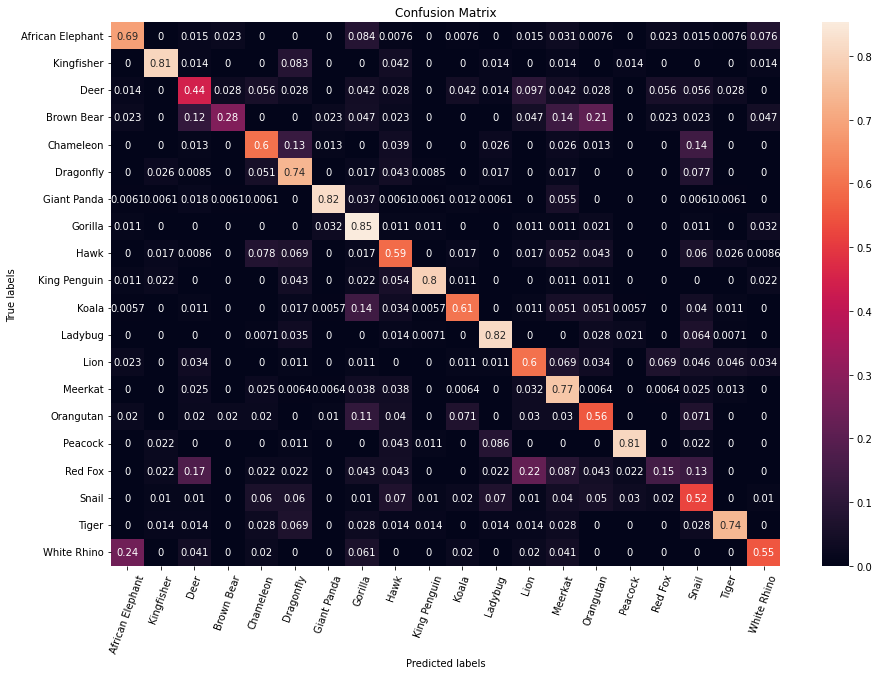

Predicted label ['Peacock' 'Giant Panda' 'Deer' 'Dragonfly']
True label ['Ladybug' 'Chameleon' 'Red Fox' 'Hawk']
Corresponding images are shown below


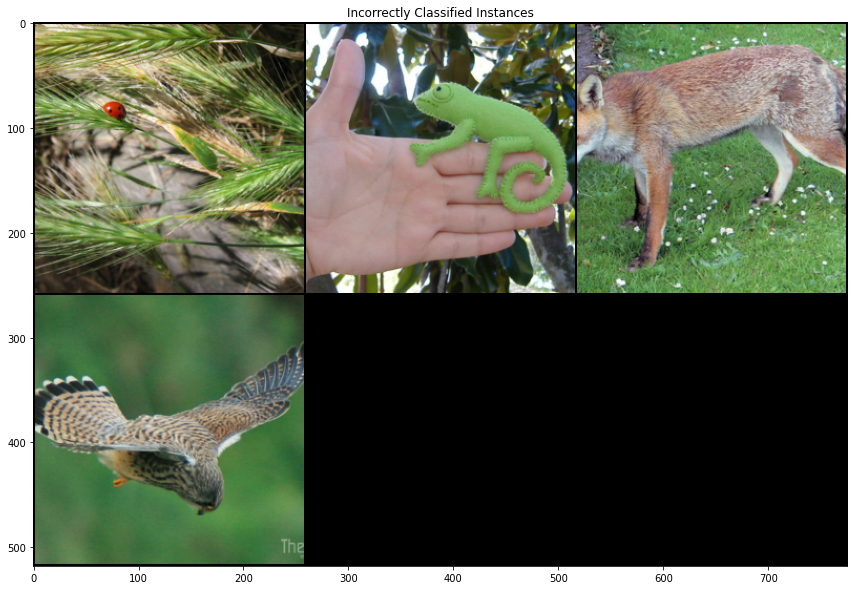

In [23]:
# Best Hyperparameters found from search
channels_and_stride = [(16, 2),(32, 2),(64, 2),(128, 2),(128, 1),(64, 2),(32, 2)]
max_pool_size = 4
epochs = 15
batch_size = 8
learning_rate = 0.0001
weight_decay = 1e-7


# define and train the network
model = MyResNet(channels_and_stride, max_pool_size)
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

start = time.time()
train_part(model, optimizer, epochs=epochs, batch_size=batch_size)
time_taken = round(time.time() - start, 3)
print(f"Training took {time_taken} seconds overall")


# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')

# Oiginal: 715 / 1998 (35.79)

---

In [ ]:
from itertools import product

def perform_search():
    channels_and_stride_combinations = [
        [(16, 2),(32, 2),(64, 2),(128, 2),(128, 1),(64, 2),(32, 2)],
        [(16, 2),(32, 2),(64, 2),(128, 2),(64, 2),(32, 2)],
        [(16, 2),(32, 2),(64, 2),(64, 4),(32, 2)],
        [(16, 2),(32, 4),(64, 4),(32, 2)],
        [(16, 2),(32, 2),(64, 2),(128, 1),(256, 2), (128, 1),(64, 2),(32, 2)],
        [(16, 2),(32, 2),(64, 2),(128, 2),(64, 2),(32, 2),(16,1)]
    ]
    optimizers = [
        ('Adamax', optim.Adamax),
        ('AdamW', optim.AdamW),
        ('RAdam', optim.RAdam)
    ]
    max_pool_sizes = [4]
    batch_sizes = [8, 64, 128, 256]
    learning_rates = [0.01, 0.0001]
    weight_decays = [1e-5, 1e-5]
    epochs = [10]


    def hyperparameter_search(all_combinations):
        best_model = None
        best_model_accuracy = 0

        for i, (channels_and_stride, (optimizer_name, optimizer_func), max_pool_size, batch_size, lr, wd, epoch) in enumerate(all_combinations):
            print(f"Combination {i + 1} out of {len(list(all_combinations))}")

            loader_train = DataLoader(
                train_set, batch_size=batch_size, shuffle=True, num_workers=2)
            loader_val = DataLoader(val_set, batch_size=batch_size,
                                    shuffle=True, num_workers=2)

            # define and train the network
            model = MyResNet(channels_and_stride, max_pool_size)
            optimizer = optimizer_func(model.parameters(), lr=lr, weight_decay=wd)

            print("Hyperparameters:")
            print(f"\tChannels and Strides: {channels_and_stride}")
            print(f"\tMax Pool Size: {max_pool_size}")
            print(f"\tOptimizer: {optimizer_name}")
            print(f"\tBatch Size: {batch_size}")
            print(f"\tLearning Rate: {lr}")
            print(f"\tWeight Decay: {wd}")
            print(f"\tRunning for {epoch} epochs")

            params = sum(p.numel() for p in model.parameters() if p.requires_grad)
            print("Total number of parameters is: {}".format(params))

            start = time.time()
            train_part(model, optimizer, epochs=epoch, batch_size=batch_size, hparam_search=True)
            time_taken = round(time.time() - start, 3)
            print(f"Training took {time_taken} seconds overall")
            accuracy = check_accuracy(loader_val, model)
            if accuracy > best_model_accuracy:
                best_model = model
                best_model_accuracy = accuracy
                print("New best model found")
            print("")

        return best_model


    all_combinations = list(product(channels_and_stride_combinations, optimizers, max_pool_sizes, batch_sizes, learning_rates, weight_decays, epochs))
    best_model = hyperparameter_search(all_combinations)

    torch.save(best_model.state_dict(), 'hparam_search_model.pt')


<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1272 / 2000 correct of val set (63.60)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


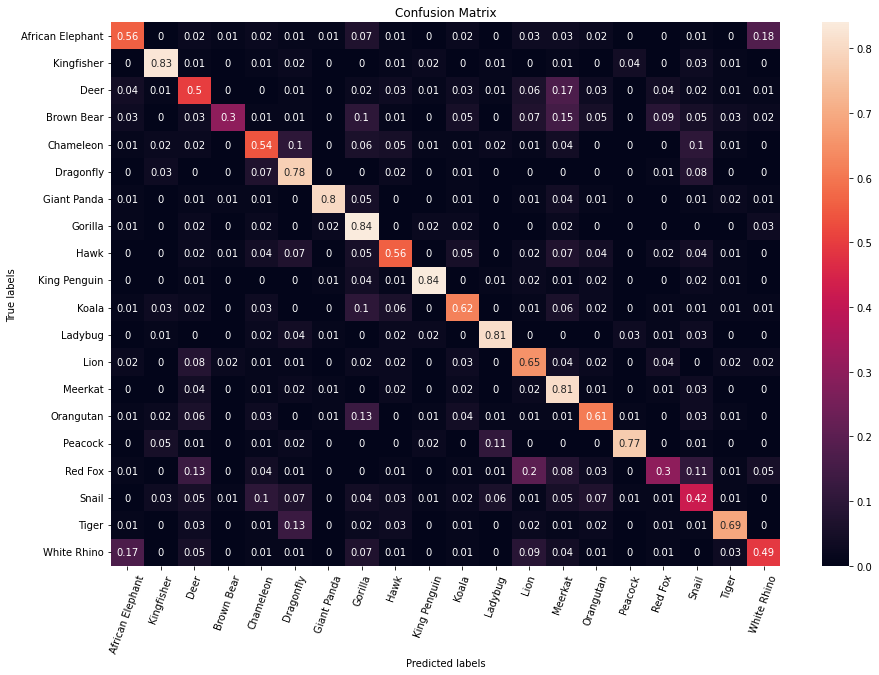

Predicted label ['Meerkat' 'Meerkat' 'Koala' 'Deer']
True label ['Tiger' 'Koala' 'Lion' 'Lion']
Corresponding images are shown below


0.636

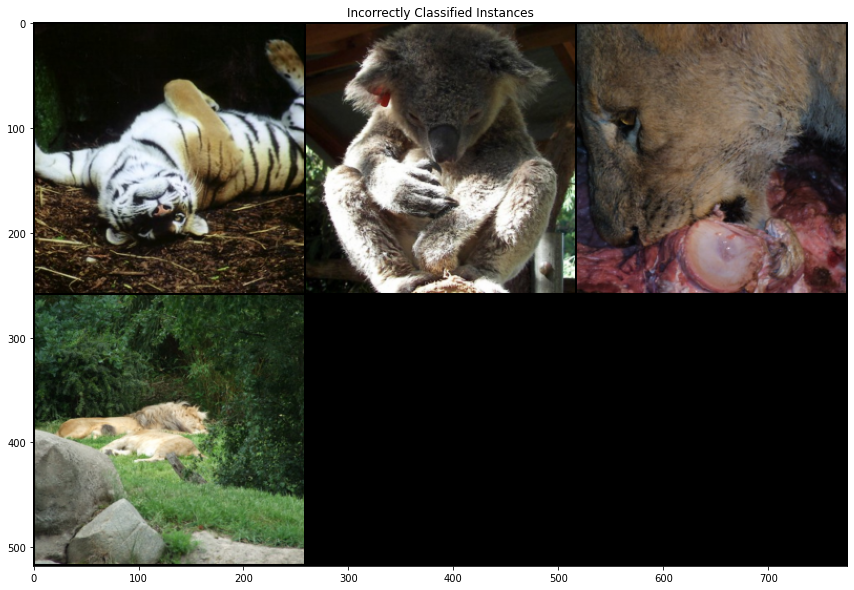

In [24]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)


___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

One method to find the best hyperparameters is to use a Genetic Algorithm. In this method, each memebr of the "population" would be a model with different hyperparameters. These hyperparameters could include the number of epochs, the number of layers and how many channels each has, the stride in each layer, the batch size of training, validation and testing, the optimizer (along with the learning rate and weight decay rate) to name a few. 

Each member would start out with a random value for each of these parameters (within a range of feasible parameters so as to not waste computation time on infeasible parameters). Once every model has finished training (one generation) we would compare them all on the same test data to see the final score - how well each memebr of the population has performed. Those with the higest score would "breed" with other models. To achieve this, the best models would be paired up, then genes (hyperparameters) from each parent would be mixed to create a new model which encompasses characteristics from both parents. To make sure that the population does not become stale, random mutations would also occur to randomly change some parameters by a small amount. 

Finally, to make sure the best performing model is never worse than the previous generation (as to not "devolve"), a handful of the best models would be copied directly into the new generation. This new generation would begin training just as the previous had. This would continue until a certain criteria had been met, such as the number of generations has reached a maximum or a certain minimum score has been met. 

This is an efficient method of searching for the best parameters, however, this is also one of the more difficult methods of training as it requires a lot more code than a simple grid search or random search approach. Moreover, training potentially hundreds of models would require a lot of computational power, potentially more than if you had done an exhaustive search over a grid of potential values. However, this does allow the algorithm to be more confident in having found the best model as it is not contrained to hard-coded values.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

Although creating a genetic algorithm would have most likely resulted in the best model being found, this would have been a lengthy task. Therefore, taking in mind the time and resources I had to find a better model, I instead opted for a grid search method. I randomly tested different models to investigate the effectiveness of changing different hyperparameters. Then I collected this data into a series of potential values for each hyperparameter. After I had assembled a grid of potential values each parameter could take, I took the cartesian product of all these parameters to find every combination possible. These then proceeded to all run to find which model performed the best. At the end, I selected the model which achieved the best score on the validation set to be my final model.

When doing my initial tests, certain hyperparameters such as the learning rate and weight decay didn't have as much of an effect as other parameters like the number of layers and stride in each layer. Therefore, I reduced the search radius for certain parameters, only testing 2 different values, and expanded the search of other parameters such as the layer architecture and batch size.

The parameters of this model were:
* Layers: 10 layers in all
  * Convolutional Layer: kernel=3, stride=1, padding=1
  * ResidualBlock: kernel=16, stride=2
  * ResidualBlock: kernel=32, stride=2
  * ResidualBlock: kernel=64, stride=2
  * ResidualBlock: kernel=128, stride=2
  * ResidualBlock: kernel=128, stride=1
  * ResidualBlock: kernel=64, stride=2
  * ResidualBlock: kernel=32, stride=2
  * MaxPool: window_size=4
  * Fully Connected Layer
* Optimizer:
  * AdamW optimizer
  * Learning rate: 0.0001
  * Weight decay: 1e-7
* Batch Size: 8
* Number of Epochs: 15

These gave me the best result, with a final validation score of **1344/1998 (67.27)** and a test score of **1272/2000 (63.60)**.

Adding more residual blocks made the model deeper, allowing the model to pick apart the initial image and learn different features more effectively than a smaller model. When comparing the models, it seemed as though the model performed consistently better, regardless of the other parameters set, than the smaller models I tested. 

Moreover, reducing the size of the batch also resulted in better results than when using a larger one of 32-128. This can be due to the fact that the network is trying to learn 20 classes, if the batch size is too large the probability of seeing multiple (if not all) examples of each class will be high. This may hinder the model from learning as it sees too much information too quickly. Limiting the batch size means that the backwards propagation of each pass of the model will be more effective. This is supported from the multiple hyperparameter searches I did.

Finally, 15 epochs gave the best performance. Because we have 20 classes, fewer epochs means it cannot generalise well enough to differentiate between these 20 classes as the learning is cut short - this led to under-fitting. However, when I increased the number of epochs past 20, it began to perform very well for the training set, achieving a low loss rate, but the validation and test sets then performed poorly, a clear indication of overfitting. When testing the different epoch levels (printing out the validation score at different intervals), 15 epochs, on average, provided the best final results.

---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions**: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

The low-level layers were able to capture the basic features of the image (in this case, an Emperor Pengiun). From the first layer, we can see how the model captures the different colours of the image, highlighting different aspects of the image. For example, in some we can see the darker colours of the iamge magnified in an inverted manner such that the lighter sections of the image appear darker and vice versa. When we move down to more layers, we then see how the outlines of the image appear. We can see the outlines of the pengiun itself along with the segments of different colour (the outlines of the dark fins, the bright chest, the feet, etc.) against the background.

When we move onto the higher-level layers, we see that as the stride progresses, the image contains fewer pixels and as such, the image is less recognisable. Instead, these layers capture different sections of the image. In certain images for example, we can see the body being specifically highlighted while the surrounding area blends in to the background. We see the same for other aspects such as the fins, the backdrop against the animal, and other such defining features. The deeper we go into the network, the more these are segmented into small sections as the precision of the image is lost. Finally, in the final fewer layers we loose all resemblence of the animal and instead, we see where the sections of the image have activated the final layers' neurons.

These final layers are what are then fed into the final fully connected layer, used for the prediction task.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

When looking at the final score on the test set of 63.6 (this varied slightly, but mainly stayed in the range of 60-65), we see that the model was able to perform fairly well on the whole. However, for models with similar tasks, we aim to get around 70% accuracy, showing that this model marginally underperforms. However, this can be due to multiple factors.

One simple method of improving this would be to increase the amount of data we have for each class. We only have ~18,000 images in the training dataset (~900 per class) which might be low for a model with a smaller architecture. Moreover, some of the images are not clear or do not contain the full animal in view. We could also add preprocessing to remove blurrier images as this might confuse the model. We can also make sure to center the images and ensure they all contain full view of the animal. Being able to determine what an animal is in a blurrier settings or from a semi-hidden view is a useful ability, however, it may be better reserved for fine-tuning of the model. This would allow us to have an initial model that was able to work near-perfect before giving it harder images to classify. When looking at the analysis, many of the mis-classified examples were where even as a human it may be tough to spot the animal in large bush or behind objects.

The classes are not completely balanced either, when looking at the training dataset, in the smallest class (Red Fox) we only have 426 images, whereas in the largest (Koala) we have 1,599. Balancing these datasets may also help certain animals be recognised better. This can be seen in the confusion matrix where the Koala has a score of 0.62 compared to the Red Foxe's 0.3. However, there could also be a factor on the type of animal and its fur/skin colour too.

Another fix we could do would be to change the architecture of the model. This could be either by adding more blocks, making the model denser/wider or we could change the model itself to be a different type, for example using AlexNet or U-Net. Bigger models may result in better generalisation when we are dealing with multiple classes as is the case here.

However, looking at the validation set after each epoch, the model was able to consistently increase its performance until we stopped it before it began overfitting. When I let the model run for longer than 20 epochs, I saw the increase in trainnig accuracy but the loss of validation accuracy as it started to overfit, therefore I stopped the epoch count at 15 which seemed to provide the best value with the most consistency.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

We have mainly used the accuracy to determine the final performance of the model. We can also see the confusion matrix for all 20 classes printed out too which can give an indication on which classes have the highest/lowest true/false postive/negative rates.

Other methods that could be utilised to better take into account the rate of the true positives and negatives would be to use the ROC curve. This is a method in which we plot the true positive rate against the negative positive rate (TPR vs FPR). We can then alter the classification threshold to determine which threshold gives the best TPR with minimal a FPR. From this curve, we can then calcuate the AUC-ROC (Area Under the ROC Curve) to give us a final score as opposed to a graph. Although the AUC-ROC score is typically used for binary classification, we can expand this to find a score for each class and then a final average score. This will then allow us to see how each class performs independently and how the model overall performs. This type of score is also very useful for comparing different models, whether that may be comparing different hyperparameters or entirely differnet architectures (e.g. ResNet vs AlexNet).

We could also use more specific scores such as precision, recall and F1 scores to investigate how the model performs when looking for specific requirements of the model. For example, if we want to minimise false positives at the risk of therefore increaseing false negatives or vice versa. These scores can be a useful measure of how we may need to change the model to better tailor to these more specific requirements.

Finally, we can also use a Class Activation Map (CAM) to bettter visualise what areas of the image have the highest influence on the outcome. This can be used for preprocessing to see if we may need to crop images or rotate them or other such pre-processing features to ensure background images are being taken into account less/more to the final output based on what we want. This could be important if we are not focussing on a single object in the image but rather the image as a whole. For example, determining what landscape we are in using the animals in the photo vs determining what animals specifically exist in the photo.

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [25]:
import matplotlib.pyplot as plt


def plot_model_features():
    fig = plt.tight_layout()
    activation = {}

    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    layer_label = 'model_layers'
    layers = getattr(model, layer_label)

    for i, layer in enumerate(layers):
        layer.register_forward_hook(get_activation(f"layer_{i}"))

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device=device, dtype=dtype)
    output = model(data)

    for i in range(len(layers)):
        layer_name = f"layer_{i}"
        act = activation[layer_name].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2

        fig, axarr = plt.subplots(nrows, ncols, figsize=(15, 5))
        fig.suptitle(layer_name)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1


<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

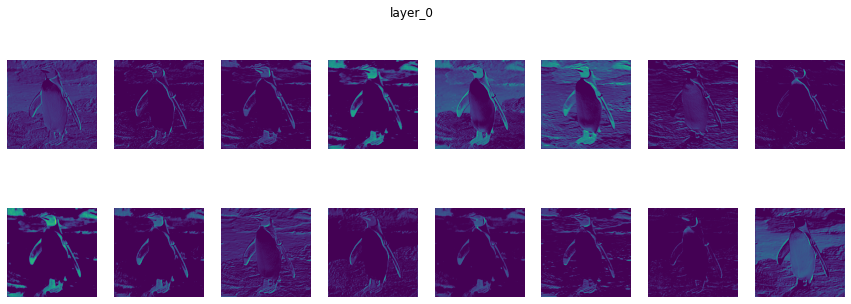

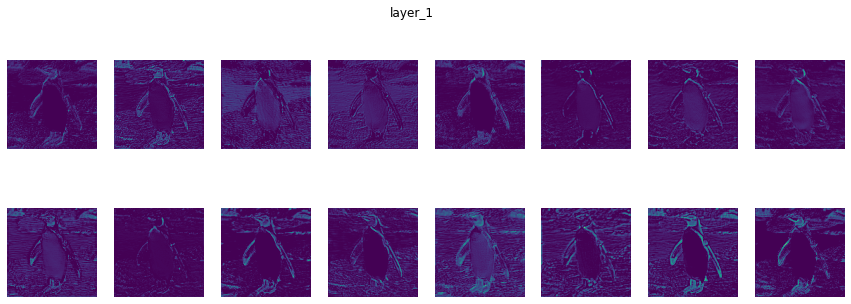

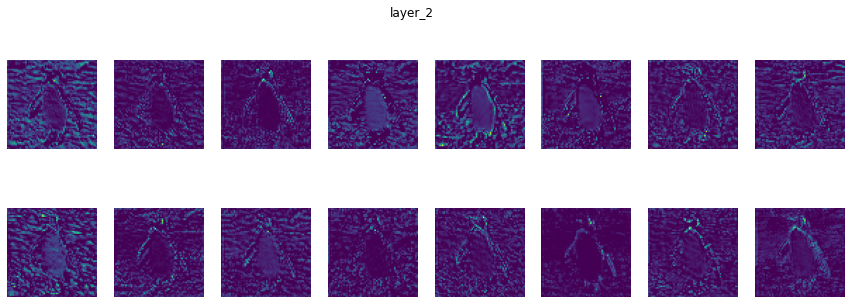

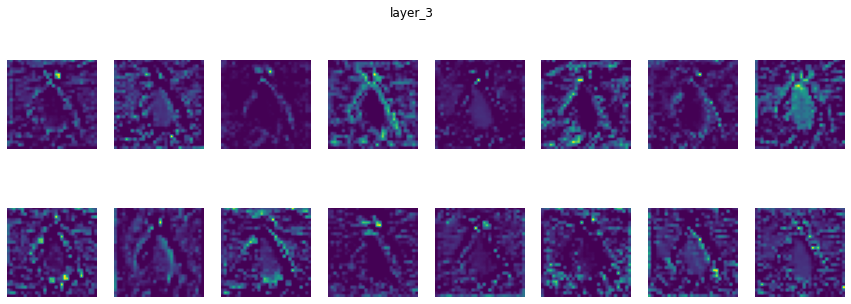

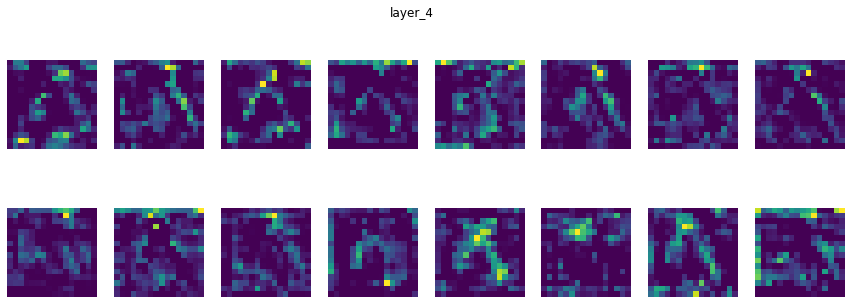

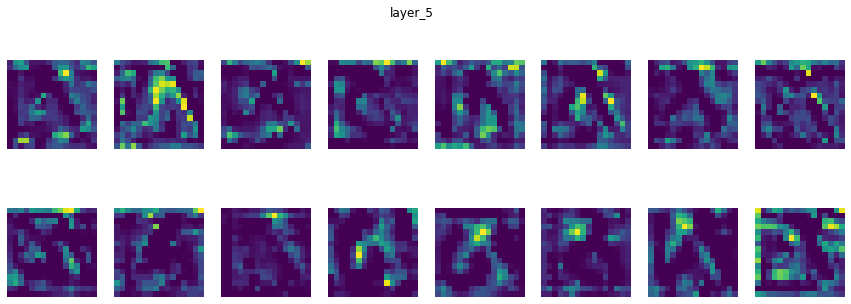

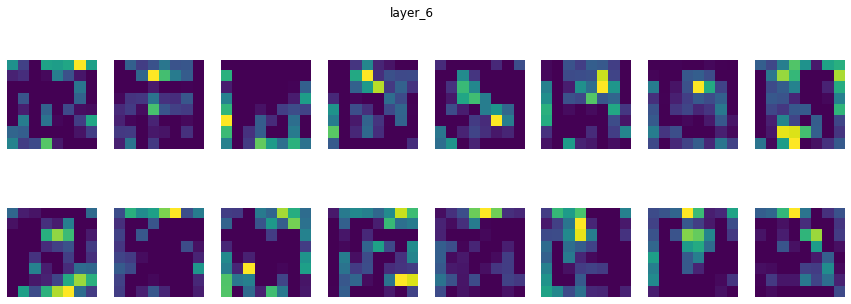

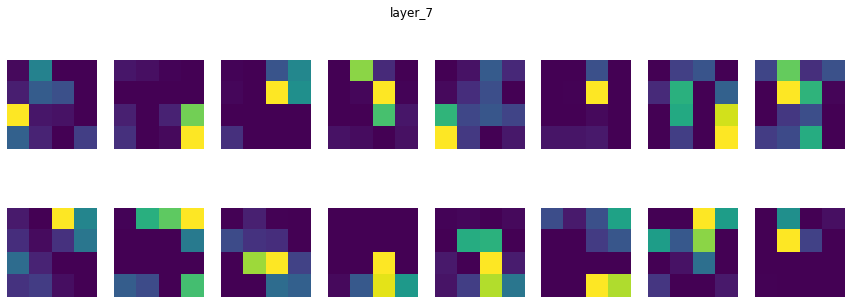

In [26]:
# Visualize the figure here, so it is exported nicely
plot_model_features()


<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.